# WeRateDogs
## Data wrangling and analysis
#### **By Ahmad Fathi**

## About

##### Real-world data rarely comes clean. Using Python and its libraries, you will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. You will document your wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.

##### The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

##### WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for you to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. More on this soon.

## Tasks

#### Your tasks in this project are as follows
#### Data wrangling, which consists of:
##### •Gathering data (downloadable file in the Resources tab in the left most panel of your classroom and linked in step 1 below).
##### •Assessing data
##### •Cleaning data
##### •Storing, analyzing, and visualizing your wrangled data
##### •Reporting on 1) your data wrangling efforts and 2) your data analyses and visualizations


# Table of contents
- [Gathering](#gather)
- [Assessing](#assess)
- [Cleaning](#clean)
- [Storing, analysing, and visualising](#store)

<a id='gather'></a>
## Gathering data

### The task
#### Gather each of the three pieces of data as described below in a Jupyter Notebook titled wrangle_act.ipynb:

##### 1 - The WeRateDogs Twitter archive. I am giving this file to you, so imagine it as a file on hand. Download this file manually by clicking the following link: twitter_archive_enhanced.csv

##### 2 - The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

##### 3 - Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json

pd.set_option('display.max_colwidth', None)

pd.set_option('display.max_columns', None)

pd.set_option('display.float_format', '{:20,.2f}'.format)

In [71]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.sort_values('timestamp')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",nan,nan,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,nan,nan,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,nan,nan,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,nan,nan,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",nan,nan,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [72]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [73]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,"2,356.00",78.00,78.00,181.00,181.00,"2,356.00","2,356.00"
mean,"742,771,590,321,719,808.00","745,507,917,855,750,656.00","20,141,706,360,873,208.00","772,039,961,038,007,040.00","12,416,983,653,017,580.00",13.13,10.46
std,"68,567,047,444,761,032.00","75,824,920,044,192,880.00","125,279,666,255,236,320.00","62,369,278,105,055,600.00","95,992,535,331,517,536.00",45.88,6.75
min,"666,020,888,022,790,144.00","665,814,696,700,723,200.00","11,856,342.00","666,104,133,288,665,088.00","783,214.00",0.00,0.00
25%,"678,398,938,214,475,776.00","675,741,911,993,464,832.00","308,637,448.75","718,631,497,683,582,976.00","4,196,983,835.00",10.00,10.00
50%,"719,627,934,716,235,776.00","703,870,840,226,598,912.00","4,196,983,835.00","780,465,709,297,995,776.00","4,196,983,835.00",11.00,10.00
75%,"799,337,304,954,252,288.00","825,780,371,286,566,912.00","4,196,983,835.00","820,314,633,777,061,888.00","4,196,983,835.00",12.00,10.00
max,"892,420,643,555,336,192.00","886,266,357,075,128,320.00","840,547,864,354,918,400.00","887,473,957,103,951,872.00","787,461,778,435,289,088.00","1,776.00",170.00


In [5]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )

In [6]:
auth = tweepy.OAuthHandler('HIDDEN', 'HIDDEN')
auth.set_access_token('HIDDEN', 'HIDDEN')
api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True,)

In [7]:
#Download Tweepy status object using Tweet ID and create a list, while counting the tweets found and those not found.
list_of_tweets = []
count1=0
count2=0
tweet_not_found = []
for tweet_id in twitter_archive['tweet_id']:   
    try:
        list_of_tweets.append(api.get_status(str(tweet_id), tweet_mode='extended'))
        count1+=1
        print("We're at " + str(count1) + " tweets found")
    except Exception as e:
        tweet_not_found.append(tweet_id)
        count2+=1
        print("We're at " + str(count2) + " tweets not found")

We're at 1 tweets found
We're at 2 tweets found
We're at 3 tweets found
We're at 4 tweets found
We're at 5 tweets found
We're at 6 tweets found
We're at 7 tweets found
We're at 8 tweets found
We're at 9 tweets found
We're at 10 tweets found
We're at 11 tweets found
We're at 12 tweets found
We're at 13 tweets found
We're at 14 tweets found
We're at 15 tweets found
We're at 16 tweets found
We're at 17 tweets found
We're at 18 tweets found
We're at 19 tweets found
We're at 1 tweets not found
We're at 20 tweets found
We're at 21 tweets found
We're at 22 tweets found
We're at 23 tweets found
We're at 24 tweets found
We're at 25 tweets found
We're at 26 tweets found
We're at 27 tweets found
We're at 28 tweets found
We're at 29 tweets found
We're at 30 tweets found
We're at 31 tweets found
We're at 32 tweets found
We're at 33 tweets found
We're at 34 tweets found
We're at 35 tweets found
We're at 36 tweets found
We're at 37 tweets found
We're at 38 tweets found
We're at 39 tweets found
We're 

We're at 305 tweets found
We're at 306 tweets found
We're at 307 tweets found
We're at 308 tweets found
We're at 309 tweets found
We're at 310 tweets found
We're at 311 tweets found
We're at 312 tweets found
We're at 313 tweets found
We're at 314 tweets found
We're at 315 tweets found
We're at 316 tweets found
We're at 317 tweets found
We're at 318 tweets found
We're at 319 tweets found
We're at 320 tweets found
We're at 321 tweets found
We're at 322 tweets found
We're at 323 tweets found
We're at 324 tweets found
We're at 325 tweets found
We're at 326 tweets found
We're at 327 tweets found
We're at 328 tweets found
We're at 329 tweets found
We're at 330 tweets found
We're at 331 tweets found
We're at 332 tweets found
We're at 333 tweets found
We're at 334 tweets found
We're at 335 tweets found
We're at 336 tweets found
We're at 337 tweets found
We're at 338 tweets found
We're at 339 tweets found
We're at 340 tweets found
We're at 341 tweets found
We're at 342 tweets found
We're at 343

We're at 616 tweets found
We're at 617 tweets found
We're at 618 tweets found
We're at 619 tweets found
We're at 620 tweets found
We're at 621 tweets found
We're at 622 tweets found
We're at 623 tweets found
We're at 624 tweets found
We're at 625 tweets found
We're at 626 tweets found
We're at 627 tweets found
We're at 628 tweets found
We're at 629 tweets found
We're at 630 tweets found
We're at 631 tweets found
We're at 632 tweets found
We're at 633 tweets found
We're at 634 tweets found
We're at 635 tweets found
We're at 636 tweets found
We're at 637 tweets found
We're at 638 tweets found
We're at 639 tweets found
We're at 640 tweets found
We're at 641 tweets found
We're at 642 tweets found
We're at 643 tweets found
We're at 644 tweets found
We're at 645 tweets found
We're at 646 tweets found
We're at 647 tweets found
We're at 648 tweets found
We're at 649 tweets found
We're at 650 tweets found
We're at 651 tweets found
We're at 652 tweets found
We're at 653 tweets found
We're at 654

Rate limit reached. Sleeping for: 393


We're at 876 tweets found
We're at 877 tweets found
We're at 878 tweets found
We're at 879 tweets found
We're at 880 tweets found
We're at 881 tweets found
We're at 882 tweets found
We're at 883 tweets found
We're at 884 tweets found
We're at 885 tweets found
We're at 886 tweets found
We're at 887 tweets found
We're at 888 tweets found
We're at 889 tweets found
We're at 890 tweets found
We're at 891 tweets found
We're at 892 tweets found
We're at 893 tweets found
We're at 894 tweets found
We're at 895 tweets found
We're at 896 tweets found
We're at 897 tweets found
We're at 898 tweets found
We're at 899 tweets found
We're at 900 tweets found
We're at 901 tweets found
We're at 902 tweets found
We're at 903 tweets found
We're at 904 tweets found
We're at 905 tweets found
We're at 906 tweets found
We're at 907 tweets found
We're at 908 tweets found
We're at 909 tweets found
We're at 24 tweets not found
We're at 910 tweets found
We're at 911 tweets found
We're at 912 tweets found
We're at 

We're at 1183 tweets found
We're at 1184 tweets found
We're at 1185 tweets found
We're at 1186 tweets found
We're at 1187 tweets found
We're at 1188 tweets found
We're at 1189 tweets found
We're at 1190 tweets found
We're at 1191 tweets found
We're at 1192 tweets found
We're at 1193 tweets found
We're at 1194 tweets found
We're at 1195 tweets found
We're at 1196 tweets found
We're at 1197 tweets found
We're at 1198 tweets found
We're at 1199 tweets found
We're at 1200 tweets found
We're at 1201 tweets found
We're at 1202 tweets found
We're at 1203 tweets found
We're at 1204 tweets found
We're at 1205 tweets found
We're at 1206 tweets found
We're at 1207 tweets found
We're at 1208 tweets found
We're at 1209 tweets found
We're at 1210 tweets found
We're at 1211 tweets found
We're at 1212 tweets found
We're at 1213 tweets found
We're at 1214 tweets found
We're at 1215 tweets found
We're at 1216 tweets found
We're at 1217 tweets found
We're at 1218 tweets found
We're at 1219 tweets found
W

We're at 1487 tweets found
We're at 1488 tweets found
We're at 1489 tweets found
We're at 1490 tweets found
We're at 1491 tweets found
We're at 1492 tweets found
We're at 1493 tweets found
We're at 1494 tweets found
We're at 1495 tweets found
We're at 1496 tweets found
We're at 1497 tweets found
We're at 1498 tweets found
We're at 1499 tweets found
We're at 1500 tweets found
We're at 1501 tweets found
We're at 1502 tweets found
We're at 1503 tweets found
We're at 1504 tweets found
We're at 1505 tweets found
We're at 1506 tweets found
We're at 1507 tweets found
We're at 1508 tweets found
We're at 1509 tweets found
We're at 1510 tweets found
We're at 1511 tweets found
We're at 1512 tweets found
We're at 1513 tweets found
We're at 1514 tweets found
We're at 1515 tweets found
We're at 1516 tweets found
We're at 1517 tweets found
We're at 1518 tweets found
We're at 1519 tweets found
We're at 1520 tweets found
We're at 1521 tweets found
We're at 1522 tweets found
We're at 1523 tweets found
W

Rate limit reached. Sleeping for: 475


We're at 1774 tweets found
We're at 1775 tweets found
We're at 1776 tweets found
We're at 1777 tweets found
We're at 1778 tweets found
We're at 1779 tweets found
We're at 1780 tweets found
We're at 1781 tweets found
We're at 1782 tweets found
We're at 1783 tweets found
We're at 1784 tweets found
We're at 1785 tweets found
We're at 1786 tweets found
We're at 1787 tweets found
We're at 1788 tweets found
We're at 1789 tweets found
We're at 1790 tweets found
We're at 1791 tweets found
We're at 1792 tweets found
We're at 1793 tweets found
We're at 1794 tweets found
We're at 1795 tweets found
We're at 1796 tweets found
We're at 1797 tweets found
We're at 1798 tweets found
We're at 1799 tweets found
We're at 1800 tweets found
We're at 1801 tweets found
We're at 1802 tweets found
We're at 1803 tweets found
We're at 1804 tweets found
We're at 1805 tweets found
We're at 1806 tweets found
We're at 1807 tweets found
We're at 1808 tweets found
We're at 1809 tweets found
We're at 1810 tweets found
W

We're at 2078 tweets found
We're at 2079 tweets found
We're at 2080 tweets found
We're at 2081 tweets found
We're at 2082 tweets found
We're at 2083 tweets found
We're at 2084 tweets found
We're at 2085 tweets found
We're at 2086 tweets found
We're at 2087 tweets found
We're at 2088 tweets found
We're at 2089 tweets found
We're at 2090 tweets found
We're at 2091 tweets found
We're at 2092 tweets found
We're at 2093 tweets found
We're at 2094 tweets found
We're at 2095 tweets found
We're at 2096 tweets found
We're at 2097 tweets found
We're at 2098 tweets found
We're at 2099 tweets found
We're at 2100 tweets found
We're at 2101 tweets found
We're at 2102 tweets found
We're at 2103 tweets found
We're at 2104 tweets found
We're at 2105 tweets found
We're at 2106 tweets found
We're at 2107 tweets found
We're at 2108 tweets found
We're at 2109 tweets found
We're at 2110 tweets found
We're at 2111 tweets found
We're at 2112 tweets found
We're at 2113 tweets found
We're at 2114 tweets found
W

In [8]:
print("The list of tweets" ,len(list_of_tweets))
print("The list of tweets not found" , len(tweet_not_found))

The list of tweets 2331
The list of tweets not found 25


In [9]:
#Append the dictionaries into a list
my_list_of_dicts = []
for each_json_tweet in list_of_tweets:
    my_list_of_dicts.append(each_json_tweet)

In [10]:
#Put the list of dictionaries in a text file
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))

In [33]:
#Let's look at some of the data from the JSON dictionaries, and create a dataframe from them.
df_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['full_text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        followers_count = each_dictionary['user']['followers_count']
        friends_count = each_dictionary['user']['friends_count']
        whole_source = each_dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        df_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'followers_count': int(followers_count),
                             'friends_count': int(friends_count),
                             'url': url,
                             'source': source,
                             'retweeted_status': retweeted_status,
                             'whole_tweet': whole_tweet
                            })
        tweet_json = pd.DataFrame(df_list, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count', 'friends_count','source', 
                                                           'retweeted_status', 'url', 'whole_tweet'])


<a id='assess'></a>
## Assessing the data

#### After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues in your wrangle_act.ipynb Jupyter Notebook. To meet specifications, the issues that satisfy the Project Motivation (see the Key Points header on the previous page) must be assessed.

In [74]:
tweet_json.head(1000)

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url,whole_tweet
0,892420643555336193,35073,7374,8963545,17,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
1,892177421306343426,30365,5494,8963545,17,Twitter for iPhone,Original tweet,https://t.co/0Xxu71qeIV,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"
2,891815181378084864,22829,3632,8963545,17,Twitter for iPhone,Original tweet,https://t.co/wUnZnhtVJB,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
3,891689557279858688,38350,7553,8963545,17,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
4,891327558926688256,36622,8140,8963545,17,Twitter for iPhone,Original tweet,https://t.co/AtUZn91f7f,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f"
...,...,...,...,...,...,...,...,...,...
995,746790600704425984,4707,1532,8963551,17,Twitter for iPhone,Original tweet,https://t.co/jeWEGUgbXf,When you just can't resist... 10/10 topnotch tongue https://t.co/jeWEGUgbXf
996,746757706116112384,9253,3754,8963551,17,Vine - Make a Scene,Original tweet,https://t.co/bROYbceZ1u,This is Maddie. She gets some wicked air time. Hardcore barkour. 11/10 nimble af https://t.co/bROYbceZ1u
997,746726898085036033,5864,1728,8963551,17,Twitter for iPhone,Original tweet,https://t.co/gLbLiZtwsp,Meet Abby. She's incredibly distracting. Just wants to help steer. Hazardous af. Still 12/10 would pet while driving https://t.co/gLbLiZtwsp
998,746542875601690625,4877,1821,8963551,17,Vine - Make a Scene,Original tweet,https://t.co/6ZRoZUWFmd,Here's a golden floofer helping with the groceries. Bed got in way. Still 11/10 helpful af (vid by @categoen) https://t.co/6ZRoZUWFmd


In [35]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2331 non-null   object
 1   favorite_count    2331 non-null   int64 
 2   retweet_count     2331 non-null   int64 
 3   followers_count   2331 non-null   int64 
 4   friends_count     2331 non-null   int64 
 5   source            2331 non-null   object
 6   retweeted_status  2331 non-null   object
 7   url               2331 non-null   object
 8   whole_tweet       2331 non-null   object
dtypes: int64(4), object(5)
memory usage: 164.0+ KB


In [36]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [37]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [38]:
tweet_json

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url,whole_tweet
0,892420643555336193,35073,7374,8963545,17,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,30365,5494,8963545,17,Twitter for iPhone,Original tweet,https://t.co/0Xxu71qeIV,This is Tilly. She's just checking pup on you....
2,891815181378084864,22829,3632,8963545,17,Twitter for iPhone,Original tweet,https://t.co/wUnZnhtVJB,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,38350,7553,8963545,17,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,36622,8140,8963545,17,Twitter for iPhone,Original tweet,https://t.co/AtUZn91f7f,This is Franklin. He would like you to stop ca...
...,...,...,...,...,...,...,...,...,...
2326,666049248165822465,94,38,8963572,17,Twitter for iPhone,Original tweet,https://t.co/4B7cOc1EDq,Here we have a 1949 1st generation vulpix. Enj...
2327,666044226329800704,260,122,8963572,17,Twitter for iPhone,Original tweet,https://t.co/DWnyCjf2mx,This is a purebred Piers Morgan. Loves to Netf...
2328,666033412701032449,107,39,8963572,17,Twitter for iPhone,Original tweet,https://t.co/y671yMhoiR,Here is a very happy pup. Big fan of well-main...
2329,666029285002620928,118,41,8963572,17,Twitter for iPhone,Original tweet,https://t.co/r7mOb2m0UI,This is a western brown Mitsubishi terrier. Up...


In [39]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [40]:
sum(twitter_archive['tweet_id'].duplicated())

0

In [41]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [42]:
print(twitter_archive.loc[twitter_archive.rating_numerator == 1776, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_numerator == 44, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_numerator == 666, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_numerator == 1176, 'text'])
print(twitter_archive.loc[twitter_archive.rating_numerator == 144, 'text'])

979    This is Atticus. He's quite simply America af....
Name: text, dtype: object
1433    Happy Wednesday here's a bucket of pups. 44/40...
Name: text, dtype: object
189    @s8n You tried very hard to portray this good ...
Name: text, dtype: object
Series([], Name: text, dtype: object)
1779    IT'S PUPPERGEDDON. Total of 144/120 ...I think...
Name: text, dtype: object


In [ ]:
print(twitter_archive['text'][1663])#Tweet elaborates ratings

In [59]:
#Taking a look at numerators and denominators
print(twitter_archive['text'][189]) #No picture
print(twitter_archive['text'][313]) #No rating with denom 0 allowed
print(twitter_archive['text'][1120]) #Rating multiplied for 17 dogs
print(twitter_archive['text'][1634]) #Rating multiplied, 13
print(twitter_archive['text'][1779]) #Rating multiplied, 12

@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3
IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq


In [44]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [61]:
print(twitter_archive.loc[twitter_archive.rating_denominator == 2, 'text'])
print(twitter_archive.loc[twitter_archive.rating_denominator == 7, 'text'])
print(twitter_archive.loc[twitter_archive.rating_denominator == 11, 'text'])
print(twitter_archive.loc[twitter_archive.rating_denominator == 15, 'text'])
print(twitter_archive.loc[twitter_archive.rating_denominator == 16, 'text']) 

2335    This is an Albanian 3 1/2 legged  Episcopalian...
Name: text, dtype: object
516    Meet Sam. She smiles 24/7 &amp; secretly aspir...
Name: text, dtype: object
784     RT @dog_rates: After so many requests, this is...
1068    After so many requests, this is Bretagne. She ...
1662    This is Darrel. He just robbed a 7/11 and is i...
Name: text, dtype: object
342    @docmisterio account started on 11/15/15
Name: text, dtype: object
1663    I'm aware that I could've said 20/16, but here...
Name: text, dtype: object


In [69]:
# Tweets with no ratings and retweets will be deleted
print(twitter_archive['text'][784]) #Retweet
print(twitter_archive['text'][1068]) #Rating should be 14/10
print(twitter_archive['text'][1662]) #Rating should be 10/10
print(twitter_archive['text'][2335]) #Rating should be 9/10
print(twitter_archive['text'][342]) #No rating
print(twitter_archive['text'][516]) #No rating

RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
@docmisterio account started on 11/15/15
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx


In [68]:
image_prediction.sample(100)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1960,866334964761202691,https://pbs.twimg.com/media/DAXXDQNXgAAoYQH.jpg,1,Samoyed,0.984086,True,Pomeranian,0.007919,True,keeshond,0.003328,True
991,708026248782585858,https://pbs.twimg.com/ext_tw_video_thumb/70802...,1,malinois,0.786468,True,Chesapeake_Bay_retriever,0.068979,True,Siamese_cat,0.029304,False
2004,877316821321428993,https://pbs.twimg.com/media/DCza_vtXkAQXGpC.jpg,1,Saluki,0.509967,True,Italian_greyhound,0.090497,True,golden_retriever,0.079406,True
1493,783085703974514689,https://pbs.twimg.com/media/Ct4URfWUAAQ7lKe.jpg,1,Chesapeake_Bay_retriever,0.240602,True,Airedale,0.164088,True,boxer,0.134506,True
466,675015141583413248,https://pbs.twimg.com/media/CV4iqh5WcAEV1E6.jpg,1,street_sign,0.290091,False,golden_retriever,0.258372,True,sandbar,0.132173,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1024,710588934686908417,https://pbs.twimg.com/media/CdyE2x1W8AAe0TG.jpg,4,Pembroke,0.982004,True,Cardigan,0.008943,True,malamute,0.007550,True
1156,733460102733135873,https://pbs.twimg.com/media/Ci3GDeyUoAAKOxn.jpg,1,chow,0.931275,True,beaver,0.028831,False,dhole,0.017379,False
1673,813127251579564032,https://pbs.twimg.com/media/C0jO6aBWEAAM28r.jpg,1,Norwegian_elkhound,0.432416,True,whippet,0.374223,True,Siberian_husky,0.032463,True
1158,733822306246479872,https://pbs.twimg.com/media/Ci8Pfg_UUAA2m9i.jpg,1,Lhasa,0.457356,True,Shih-Tzu,0.371282,True,Tibetan_terrier,0.048359,True


In [55]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [76]:
sum(image_prediction.jpg_url.duplicated())

66

In [75]:
pd.concat(g for _, g in image_prediction.groupby("jpg_url") if len(g) > 1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.30,False,golden_retriever,0.18,True,Brittany_spaniel,0.16,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.30,False,golden_retriever,0.18,True,Brittany_spaniel,0.16,True
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,1,Chihuahua,0.51,True,Pomeranian,0.12,True,toy_terrier,0.08,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,1,Chihuahua,0.51,True,Pomeranian,0.12,True,toy_terrier,0.08,True
1691,815966073409433600,https://pbs.twimg.com/ext_tw_video_thumb/815965888126062592/pu/img/JleSw4wRhgKDWQj5.jpg,1,Tibetan_mastiff,0.51,True,Tibetan_terrier,0.30,True,otterhound,0.04,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.15,False,French_bulldog,0.10,True,printer,0.08,False
2051,887473957103951883,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.81,True,Rhodesian_ridgeback,0.05,True,beagle,0.04,True
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.81,True,Rhodesian_ridgeback,0.05,True,beagle,0.04,True
1033,711694788429553666,https://pbs.twimg.com/tweet_video_thumb/CeBym7oXEAEWbEg.jpg,1,brown_bear,0.71,False,Indian_elephant,0.17,False,water_buffalo,0.04,False


In [77]:
print(image_prediction.p1_dog.value_counts())
print(image_prediction.p2_dog.value_counts())
print(image_prediction.p3_dog.value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


In [78]:
image_prediction.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [89]:
image_prediction.p1.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

In [79]:
tweet_json.sample(10)

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url,whole_tweet
901,755206590534418437,15983,5168,8963551,17,Twitter for iPhone,Original tweet,https://t.co/I5ld3eKD5k,This is one of the most inspirational stories I've ever come across. I have no words. 14/10 for both doggo and owner https://t.co/I5ld3eKD5k
1645,682429480204398592,3314,1101,8963557,17,Twitter for iPhone,Original tweet,https://t.co/5aFw7SWyxU,"I know we joke around on here, but this is getting really frustrating. We rate dogs. Not T-Rex. Thank you... 8/10 https://t.co/5aFw7SWyxU"
320,832682457690300417,11574,2815,8963546,17,Twitter for iPhone,Original tweet,https://t.co/8YlD5lxPbQ,Prosperous good boy 13/10 socioeconomic af https://t.co/8YlD5lxPbQ
2025,671497587707535361,861,416,8963573,17,Twitter for iPhone,Original tweet,https://t.co/EY1uZJUGYJ,This is Pip. He is a ship captain. Many years of experience sailing the treacherous open sea. 11/10 https://t.co/EY1uZJUGYJ
2219,667886921285246976,1730,977,8963573,17,Twitter for iPhone,Original tweet,https://t.co/MT7Q4aDQS1,This is Erik. He's fucken massive. But also kind. Let's people hug him for free. Looks soft. 11/10 I would hug Erik https://t.co/MT7Q4aDQS1
1345,702332542343577600,3060,1480,8963554,17,Vine - Make a Scene,Original tweet,https://t.co/Dph4FDGoMd,This is Rudy. He's going to be a star. 13/10 talented af (vid by @madalynrossi) https://t.co/Dph4FDGoMd
2111,670055038660800512,616,296,8963573,17,Twitter for iPhone,Original tweet,https://t.co/0gY6XTOpn3,This is Tommy. He's a cool dog. Hard not to step on. Won't let go of seashell. Not fast by any means. 3/10 https://t.co/0gY6XTOpn3
1691,680221482581123072,1421,281,8963557,17,Twitter for iPhone,Original tweet,https://t.co/ZJUypFFwvg,This is CeCe. She's patiently waiting for Santa. 10/10 https://t.co/ZJUypFFwvg
90,874434818259525634,0,12808,8963544,17,Twitter for iPhone,This is a retweet,This is a retweet,RT @dog_rates: This is Coco. At first I thought she was a cloud but clouds don't bork with such passion. 12/10 would hug softly https://t.c…
903,754874841593970688,0,7631,8963551,17,Twitter for iPhone,This is a retweet,This is a retweet,RT @dog_rates: This is Rubio. He has too much skin. 11/10 https://t.co/NLOHmlENag


In [82]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2331 non-null   object
 1   favorite_count    2331 non-null   int64 
 2   retweet_count     2331 non-null   int64 
 3   followers_count   2331 non-null   int64 
 4   friends_count     2331 non-null   int64 
 5   source            2331 non-null   object
 6   retweeted_status  2331 non-null   object
 7   url               2331 non-null   object
 8   whole_tweet       2331 non-null   object
dtypes: int64(4), object(5)
memory usage: 164.0+ KB


In [81]:
tweet_json.retweeted_status.value_counts()

Original tweet       2168
This is a retweet     163
Name: retweeted_status, dtype: int64

In [80]:
tweet_json.source.value_counts()

Twitter for iPhone     2197
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                10
Name: source, dtype: int64

<a id='clean'></a>
## Cleaning data

In [83]:
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_json_clean = tweet_json.copy()

In [84]:
#1-Delete retweets
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean['retweeted_status_user_id'])]

print(sum(twitter_archive_clean.retweeted_status_user_id.value_counts()))

0


In [85]:
#2-Delete unneeded columns
print(list(twitter_archive_clean))

twitter_archive_clean = twitter_archive_clean.drop(['source',
                                                    'in_reply_to_status_id',
                                                    'in_reply_to_user_id',
                                                    'retweeted_status_id',
                                                    'retweeted_status_user_id', 
                                                    'retweeted_status_timestamp', 
                                                    'expanded_urls'], 1)

['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']


In [86]:
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [90]:
#3-Create a column from the dog stage columns
twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars=['tweet_id',
                                                                'timestamp',
                                                                'text',
                                                                'rating_numerator',
                                                                'rating_denominator',
                                                                'name'],
                                 var_name='dogs', 
                                value_name='dogs_stage')

twitter_archive_clean = twitter_archive_clean.drop('dogs', 1)

twitter_archive_clean = twitter_archive_clean.sort_values('dogs_stage').drop_duplicates(subset='tweet_id',keep='last')                       

In [91]:
twitter_archive_clean['dogs_stage'].value_counts()

None       1831
pupper      234
doggo        75
puppo        25
floofer      10
Name: dogs_stage, dtype: int64

In [92]:
#4-Convert the timestamp into day, month, and year.
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

twitter_archive_clean['year'] = twitter_archive_clean['timestamp'].dt.year
twitter_archive_clean['month'] = twitter_archive_clean['timestamp'].dt.month
twitter_archive_clean['day'] = twitter_archive_clean['timestamp'].dt.day

twitter_archive_clean = twitter_archive_clean.drop('timestamp', 1)

In [93]:
list(twitter_archive_clean)

['tweet_id',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dogs_stage',
 'year',
 'month',
 'day']

In [94]:
#5-Convert them numerators and denominators type to float
twitter_archive_clean[['rating_numerator', 'rating_denominator']] = twitter_archive_clean[['rating_numerator','rating_denominator']].astype(float)

twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 2095 to 7298
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   int64  
 1   text                2175 non-null   object 
 2   rating_numerator    2175 non-null   float64
 3   rating_denominator  2175 non-null   float64
 4   name                2175 non-null   object 
 5   dogs_stage          2175 non-null   object 
 6   year                2175 non-null   int64  
 7   month               2175 non-null   int64  
 8   day                 2175 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 169.9+ KB


In [95]:
#6-Update some numerators manually
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

display(twitter_archive_clean[twitter_archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")][['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\Ahmad\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
42,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.00
3685,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.00
3708,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.00
2733,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.00
4967,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.00


In [96]:
#7-Further manual updates
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 740373189193256964), 'rating_numerator'] = 14
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 740373189193256964), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 682962037429899265), 'rating_numerator'] = 10
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 682962037429899265), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 666287406224695296), 'rating_numerator'] = 9
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 666287406224695296), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 722974582966214656), 'rating_numerator'] = 13
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 722974582966214656), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 716439118184652801), 'rating_numerator'] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 716439118184652801), 'rating_denominator'] = 10

display(twitter_archive_clean[twitter_archive_clean['rating_denominator'] != 10][['tweet_id',
                                                                                  'text',
                                                                                  'rating_numerator',
                                                                                  'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
3429,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44.00,40.00
3631,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121.00,110.00
3630,684225744407494656,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143.00,130.00
3659,682808988178739200,"I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible",20.00,16.00
3594,686035780142297088,"Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating",4.00,20.00
3250,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.00,80.00
3225,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.00,90.00
3270,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.00,50.00
3347,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.00,50.00
3775,677716515794329600,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,144.00,120.00


In [98]:
#8-Delete the tweets for which there are no ratings
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 832088576586297345]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 810984652412424192]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 682808988178739200]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 835246439529840640]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 686035780142297088]

In [99]:
#9-Create a new column for rating, which is numerator divided by denomerator, multiplied by 10.
twitter_archive_clean['rating'] = 10*twitter_archive_clean['rating_numerator']/twitter_archive_clean['rating_denominator'].astype(float)

twitter_archive_clean.sample(10)

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,year,month,day,rating
10,890006608113172480,This is Koda. He is a South Australian deckshark. Deceptively deadly. Frighteningly majestic. 13/10 would risk a petting #BarkWeek https://t.co/dVPW0B0Mme,13.00,10.00,Koda,None,2017,7,26,13.00
2871,763183847194451968,This is Clark. He collects teddy bears. It's absolutely h*ckin horrifying. 8/10 please stop this Clark https://t.co/EDMcwt86fU,8.00,10.00,Clark,None,2016,8,10,8.00
2538,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.00,70.00,None,None,2017,1,15,12.00
3210,715220193576927233,This is Nico. His selfie game is strong af. Excellent use of a sneaky tongue slip. 10/10 star material https://t.co/1OBdJkMOFx,10.00,10.00,Nico,None,2016,3,30,10.00
37,884562892145688576,This is Kevin. He's just so happy. 13/10 what is your secret Kevin https://t.co/1r4MFCbCX5,13.00,10.00,Kevin,None,2017,7,11,13.00
3298,707610948723478529,This is Harper. She scraped her elbow attempting a backflip off a tree. Valiant effort tho. 12/10 https://t.co/oHKJHghrp5,12.00,10.00,Harper,None,2016,3,9,12.00
2268,872261713294495745,This is Harry. His ears are activated one at a time. Incredibly rare to witness in person. Very special moment here. 13/10 blessed as h*ck https://t.co/ejHvGDfWoa,13.00,10.00,Harry,None,2017,6,7,13.00
3945,673689733134946305,When you're having a blast and remember tomorrow's Monday. 11/10 https://t.co/YPsJasNVGe,11.00,10.00,None,None,2015,12,7,11.00
2053,668221241640230912,These two dogs are Bo &amp; Smittens. Smittens is trying out a new deodorant and wanted Bo to smell it. 10/10 true pals https://t.co/4pw1QQ6udh,10.00,10.00,None,None,2015,11,22,10.00
3959,673352124999274496,*lets out a tiny screech and then goes into complete cardiac arrest* 12/10 https://t.co/az5PLGzVNJ,12.00,10.00,None,None,2015,12,6,12.00


In [100]:
#10-Delete duplicates in jpg_url
image_prediction_clean = image_prediction_clean.drop_duplicates(subset=['jpg_url'], keep='last')

sum(image_prediction_clean['jpg_url'].duplicated())

0

In [101]:
#11-Use first prediction to be true as dog type and capture the confidence level in the prediction.
dog_type = []
confidence_list = []

def image(image_prediction_clean):
    if image_prediction_clean['p1_dog'] == True:
        dog_type.append(image_prediction_clean['p1'])
        confidence_list.append(image_prediction_clean['p1_conf'])
    elif image_prediction_clean['p2_dog'] == True:
        dog_type.append(image_prediction_clean['p2'])
        confidence_list.append(image_prediction_clean['p2_conf'])
    elif image_prediction_clean['p3_dog'] == True:
        dog_type.append(image_prediction_clean['p3'])
        confidence_list.append(image_prediction_clean['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_list.append('Error')

image_prediction_clean.apply(image, axis=1)

image_prediction_clean['dog_type'] = dog_type
image_prediction_clean['confidence_list'] = confidence_list

<ipython-input-101-93e7a33b3625>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  image_prediction_clean['dog_type'] = dog_type
<ipython-input-101-93e7a33b3625>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  image_prediction_clean['confidence_list'] = confidence_list


In [102]:
#12-Drop rows that contain errors in prediction
image_prediction_clean = image_prediction_clean[image_prediction_clean['dog_type'] != 'Error']

image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         1691 non-null   int64  
 1   jpg_url          1691 non-null   object 
 2   img_num          1691 non-null   int64  
 3   p1               1691 non-null   object 
 4   p1_conf          1691 non-null   float64
 5   p1_dog           1691 non-null   bool   
 6   p2               1691 non-null   object 
 7   p2_conf          1691 non-null   float64
 8   p2_dog           1691 non-null   bool   
 9   p3               1691 non-null   object 
 10  p3_conf          1691 non-null   float64
 11  p3_dog           1691 non-null   bool   
 12  dog_type         1691 non-null   object 
 13  confidence_list  1691 non-null   object 
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 163.5+ KB


In [103]:
#13-Get rid of unneeded columns
print(list(image_prediction_clean))

image_prediction_clean = image_prediction_clean.drop(['img_num', 'p1', 
                                                      'p1_conf', 'p1_dog', 
                                                      'p2', 'p2_conf', 
                                                      'p2_dog', 'p3', 
                                                      'p3_conf', 
                                                      'p3_dog'], 1)

list(image_prediction_clean)

['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_type', 'confidence_list']


['tweet_id', 'jpg_url', 'dog_type', 'confidence_list']

In [104]:
#14-Only keep original tweets
tweet_json_clean = tweet_json_clean[tweet_json_clean['retweeted_status'] == 'Original tweet']

tweet_json_clean['retweeted_status'].value_counts()

Original tweet    2168
Name: retweeted_status, dtype: int64

In [106]:
#15-Merge twitter_archive_clean and image_prediction_clean into 1 dataframe
df_twitter1 = pd.merge(twitter_archive_clean, 
                      image_prediction_clean, 
                      how = 'left', on = ['tweet_id'])

#16-Keep rows that contain a picture only
df_twitter1 = df_twitter1[df_twitter1['jpg_url'].notnull()]

df_twitter1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1625 entries, 1 to 2169
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1625 non-null   int64  
 1   text                1625 non-null   object 
 2   rating_numerator    1625 non-null   float64
 3   rating_denominator  1625 non-null   float64
 4   name                1625 non-null   object 
 5   dogs_stage          1625 non-null   object 
 6   year                1625 non-null   int64  
 7   month               1625 non-null   int64  
 8   day                 1625 non-null   int64  
 9   rating              1625 non-null   float64
 10  jpg_url             1625 non-null   object 
 11  dog_type            1625 non-null   object 
 12  confidence_list     1625 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 177.7+ KB


In [115]:
#17-Change tweet_id column to int64 to match the format of the df_twitter1 dataframe
#Note: np.int64 was used because it was failing with 'int', giving the error below:
#Python int too large to convert to C long
tweet_json_clean['tweet_id'] = tweet_json_clean['tweet_id'].astype(np.int64)

tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2330
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2168 non-null   int64 
 1   favorite_count    2168 non-null   int64 
 2   retweet_count     2168 non-null   int64 
 3   followers_count   2168 non-null   int64 
 4   friends_count     2168 non-null   int64 
 5   source            2168 non-null   object
 6   retweeted_status  2168 non-null   object
 7   url               2168 non-null   object
 8   whole_tweet       2168 non-null   object
dtypes: int64(5), object(4)
memory usage: 169.4+ KB


<ipython-input-115-219f54da74ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_json_clean['tweet_id'] = tweet_json_clean['tweet_id'].astype(np.int64)


In [114]:
#18-Merge df_twitter and tweet_json_clean into 1 dataframe

df_twitter = pd.merge(df_twitter1, tweet_json_clean, 
                      how='left' ,on = ['tweet_id'])

df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1625 entries, 0 to 1624
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1625 non-null   int64  
 1   text                1625 non-null   object 
 2   rating_numerator    1625 non-null   float64
 3   rating_denominator  1625 non-null   float64
 4   name                1625 non-null   object 
 5   dogs_stage          1625 non-null   object 
 6   year                1625 non-null   int64  
 7   month               1625 non-null   int64  
 8   day                 1625 non-null   int64  
 9   rating              1625 non-null   float64
 10  jpg_url             1625 non-null   object 
 11  dog_type            1625 non-null   object 
 12  confidence_list     1625 non-null   object 
 13  favorite_count      1619 non-null   float64
 14  retweet_count       1619 non-null   float64
 15  followers_count     1619 non-null   float64
 16  friend

In [116]:
df_twitter['rating_numerator'].value_counts()

 12.00    404
 10.00    354
 11.00    342
 13.00    212
  9.00    133
  8.00     68
  7.00     31
 14.00     22
  6.00     16
  5.00     13
  4.00      6
  3.00      5
  2.00      2
 13.50      2
 44.00      1
143.00      1
 99.00      1
 45.00      1
 60.00      1
144.00      1
 88.00      1
 84.00      1
  9.75      1
  0.00      1
 11.26      1
165.00      1
 11.27      1
121.00      1
 80.00      1
Name: rating_numerator, dtype: int64

<a id='store'></a>
## Storing, Analyzing, and Visualizing Data for this Project

In [118]:
#Store the clean DataFrame in a CSV file
df_twitter.to_csv('twitter_archive_clean.csv', 
                 index=False, encoding = 'utf-8')

In [119]:
df_twitter['dog_type'].value_counts()

golden_retriever        142
Labrador_retriever      103
Pembroke                 94
Chihuahua                87
pug                      60
                       ... 
silky_terrier             1
EntleBucher               1
clumber                   1
standard_schnauzer        1
Bouvier_des_Flandres      1
Name: dog_type, Length: 113, dtype: int64

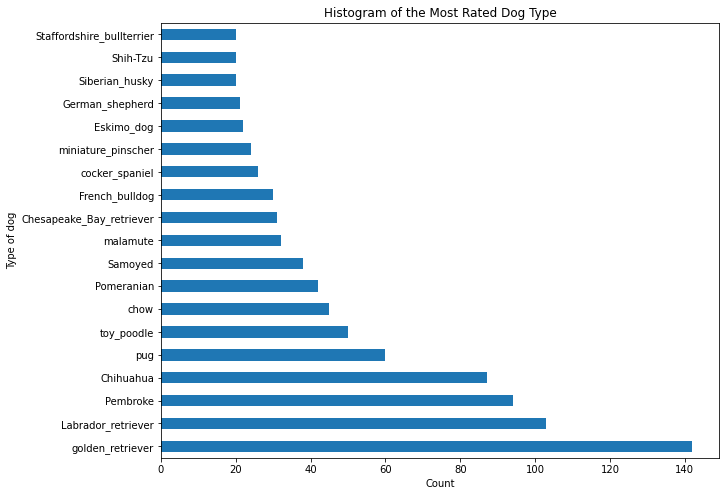

In [125]:
df_dog_type = df_twitter.groupby('dog_type').filter(lambda x: len(x) >= 20)

df_dog_type['dog_type'].value_counts().plot(kind = 'barh',figsize=(10, 8))
plt.title('Histogram of the Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

In [126]:
df_dog_type_mean = df_twitter.groupby('dog_type').mean()

In [127]:
df_dog_type_mean.head()

,tweet_id,rating_numerator,rating_denominator,year,month,day,rating,favorite_count,retweet_count,followers_count,friends_count
dog_type,,,,,,,,,,,
Afghan_hound,"809,599,852,776,681,472.00",8.00,10.00,"2,016.50",6.00,16.00,8.00,"10,772.00","3,007.00","8,963,547.00",17.00
Airedale,"718,448,940,360,117,248.00",9.83,10.00,"2,015.58",8.75,15.92,9.83,"4,669.25","1,175.25","8,963,558.25",17.00
American_Staffordshire_terrier,"759,728,394,572,314,624.00",10.31,10.00,"2,016.19",5.25,15.00,10.31,"7,475.73","1,735.60","8,963,583.00",17.00
Appenzeller,"793,933,403,993,278,464.00",11.00,10.00,"2,016.50",4.50,18.50,11.00,"6,500.00","1,207.50","8,963,550.00",17.00
Australian_terrier,"778,592,105,778,309,120.00",11.50,10.00,"2,016.50",3.50,7.00,11.50,"9,893.00","2,618.00","8,963,549.50",17.00


In [134]:
df_dog_type_sorted = df_dog_type_mean['rating'].sort_values()
pd.set_option('display.max_rows', 1000)
df_dog_type_sorted

dog_type
Japanese_spaniel                                 5.00
Afghan_hound                                     8.00
soft-coated_wheaten_terrier                      8.80
Walker_hound                                     9.00
Scotch_terrier                                   9.00
Tibetan_terrier                                  9.25
dalmatian                                        9.27
Boston_bull                                      9.42
Saint_Bernard                                    9.50
Welsh_springer_spaniel                           9.50
Dandie_Dinmont                                   9.57
Norwich_terrier                                  9.60
miniature_schnauzer                              9.60
redbone                                          9.67
English_setter                                   9.71
Maltese_dog                                      9.74
Rhodesian_ridgeback                              9.75
Scottish_deerhound                               9.75
Irish_terrier      

In [142]:
print(df_twitter.loc[df_twitter.dog_type == 'Japanese_spaniel', 'url'])
print(df_twitter.loc[df_twitter.dog_type == 'golden_retriever', 'url'])

710    https://t.co/IoLRvF0Kak
Name: url, dtype: object
8                               https://t.co/xoRWyQTcmy
30                              https://t.co/QZAnwgnOMB
37                              https://t.co/DKhgkMx4N1
43                              https://t.co/s2yYuHabWl
46                              https://t.co/azEoGqVonH
62                              https://t.co/C8U6cxI1Jc
76                              https://t.co/VFKG1vxGjB
78                              https://t.co/RhUEAloehK
94                              https://t.co/yWBqbrzy8O
110                             https://t.co/26BXueUgbs
128                             https://t.co/HTQ77yNQ5K
141                             https://t.co/chxruIOUJN
150                             https://t.co/4VsFysDmiw
154                             https://t.co/zeDpnsKX7w
155                             https://t.co/fYP5RlutfA
158                             https://t.co/Se5fZ9wp5E
159                             https://t.co/qjr

In [135]:
pd.set_option('display.max_rows', 1000)
df_twitter[df_twitter['dog_type'] == 'golden_retriever']

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,year,month,day,rating,jpg_url,dog_type,confidence_list,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url,whole_tweet
8,667530908589760512,"Meet Naphaniel. He doesn't necessarily enjoy his day job, but he's damn good at it. 10/10 https://t.co/xoRWyQTcmy",10.00,10.00,Naphaniel,None,2015,11,20,10.00,https://pbs.twimg.com/media/CUOL0uGUkAAx7yh.jpg,golden_retriever,0.63,432.00,218.00,"8,963,573.00",17.00,Twitter Web Client,Original tweet,https://t.co/xoRWyQTcmy,"Meet Naphaniel. He doesn't necessarily enjoy his day job, but he's damn good at it. 10/10 https://t.co/xoRWyQTcmy"
30,667044094246576128,12/10 gimme now https://t.co/QZAnwgnOMB,12.00,10.00,None,None,2015,11,18,12.00,https://pbs.twimg.com/media/CUHREBXXAAE6A9b.jpg,golden_retriever,0.77,174.00,44.00,"8,963,573.00",17.00,Twitter for iPhone,Original tweet,https://t.co/QZAnwgnOMB,12/10 gimme now https://t.co/QZAnwgnOMB
37,667160273090932737,This is Bradlay. He is a Ronaldinho Matsuyama mix. Can also mountain bike (wow). Loves that blue light lime. 11/10 https://t.co/DKhgkMx4N1,11.00,10.00,Bradlay,None,2015,11,19,11.00,https://pbs.twimg.com/media/CUI6uuaW4AAvCIs.jpg,golden_retriever,0.47,233.00,55.00,"8,963,573.00",17.00,Twitter for iPhone,Original tweet,https://t.co/DKhgkMx4N1,This is Bradlay. He is a Ronaldinho Matsuyama mix. Can also mountain bike (wow). Loves that blue light lime. 11/10 https://t.co/DKhgkMx4N1
43,667182792070062081,This is Timison. He just told an awful joke but is still hanging on to the hope that you'll laugh with him. 10/10 https://t.co/s2yYuHabWl,10.00,10.00,Timison,None,2015,11,19,10.00,https://pbs.twimg.com/media/CUJPNjOWsAAZRqP.jpg,golden_retriever,0.95,"13,158.00","5,576.00","8,963,573.00",17.00,Twitter for iPhone,Original tweet,https://t.co/s2yYuHabWl,This is Timison. He just told an awful joke but is still hanging on to the hope that you'll laugh with him. 10/10 https://t.co/s2yYuHabWl
46,667211855547486208,This is Genevieve. She is a golden retriever cocktail mix. Comfortable close to wall. Shows no emotions. 9/10 https://t.co/azEoGqVonH,9.00,10.00,Genevieve,None,2015,11,19,9.00,https://pbs.twimg.com/media/CUJppKJWoAA75NP.jpg,golden_retriever,0.46,446.00,219.00,"8,963,573.00",17.00,Twitter for iPhone,Original tweet,https://t.co/azEoGqVonH,This is Genevieve. She is a golden retriever cocktail mix. Comfortable close to wall. Shows no emotions. 9/10 https://t.co/azEoGqVonH
62,668286279830867968,Meet Rusty. Rusty's dreaming of a world where Twitter never got rid of favorites. Looks like a happy world. 11/10 https://t.co/C8U6cxI1Jc,11.00,10.00,Rusty,None,2015,11,22,11.00,https://pbs.twimg.com/media/CUY60usWoAAdBxx.jpg,golden_retriever,0.22,470.00,125.00,"8,963,573.00",17.00,Twitter for iPhone,Original tweet,https://t.co/C8U6cxI1Jc,Meet Rusty. Rusty's dreaming of a world where Twitter never got rid of favorites. Looks like a happy world. 11/10 https://t.co/C8U6cxI1Jc
76,666345417576210432,Look at this jokester thinking seat belt laws don't apply to him. Great tongue tho 10/10 https://t.co/VFKG1vxGjB,10.00,10.00,None,None,2015,11,16,10.00,https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg,golden_retriever,0.86,265.00,128.00,"8,963,572.00",17.00,Twitter for iPhone,Original tweet,https://t.co/VFKG1vxGjB,Look at this jokester thinking seat belt laws don't apply to him. Great tongue tho 10/10 https://t.co/VFKG1vxGjB
78,666063827256086533,This is the happiest dog you will ever see. Very committed owner. Nice couch. 10/10 https://t.co/RhUEAloehK,10.00,10.00,the,None,2015,11,16,10.00,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,golden_retriever,0.78,433.00,189.00,"8,963,572.00",17.00,Twitter for iPhone,Original tweet,https://t.co/RhUEAloehK,This is the happiest dog you will ever see. Very committed owner. Nice couch. 10/10 https://t.co/RhUEAloehK
94,666057090499244032,My oh my. This is a rare blond Canadian terrier on wheels. Only $8.98. Rather docile. 9/10 ve

In [136]:
df_dog_type_count = df_twitter.groupby('dog_type').count()
pd.set_option('display.max_rows', 1000)
df_dog_type_count

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,year,month,day,rating,jpg_url,confidence_list,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url,whole_tweet
dog_type,,,,,,,,,,,,,,,,,,,,
Afghan_hound,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Airedale,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
American_Staffordshire_terrier,16,16,16,16,16,16,16,16,16,16,16,16,15,15,15,15,15,15,15,15
Appenzeller,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Australian_terrier,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Bedlington_terrier,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Bernese_mountain_dog,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
Blenheim_spaniel,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
Border_collie,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12


In [133]:
dog_type_count = df_dog_type_count['rating']
dog_type_mean = df_dog_type_mean['rating']
pd.set_option('display.max_rows', 1000)
dog_type_mean

dog_type
Afghan_hound                                     8.00
Airedale                                         9.83
American_Staffordshire_terrier                  10.31
Appenzeller                                     11.00
Australian_terrier                              11.50
Bedlington_terrier                              10.33
Bernese_mountain_dog                            11.27
Blenheim_spaniel                                11.10
Border_collie                                   10.58
Border_terrier                                  12.14
Boston_bull                                      9.42
Bouvier_des_Flandres                            13.00
Brabancon_griffon                               10.00
Brittany_spaniel                                10.38
Cardigan                                        11.11
Chesapeake_Bay_retriever                        10.84
Chihuahua                                       10.45
Dandie_Dinmont                                   9.57
Doberman           

In [137]:
df = pd.DataFrame()
df['dog_type_count'] = dog_type_count
df['dog_type_mean'] = dog_type_mean
pd.set_option('display.max_rows', 1000)
df

,dog_type_count,dog_type_mean
dog_type,,
Afghan_hound,2,8.00
Airedale,12,9.83
American_Staffordshire_terrier,16,10.31
Appenzeller,2,11.00
Australian_terrier,2,11.50
Bedlington_terrier,6,10.33
Bernese_mountain_dog,11,11.27
Blenheim_spaniel,10,11.10
Border_collie,12,10.58


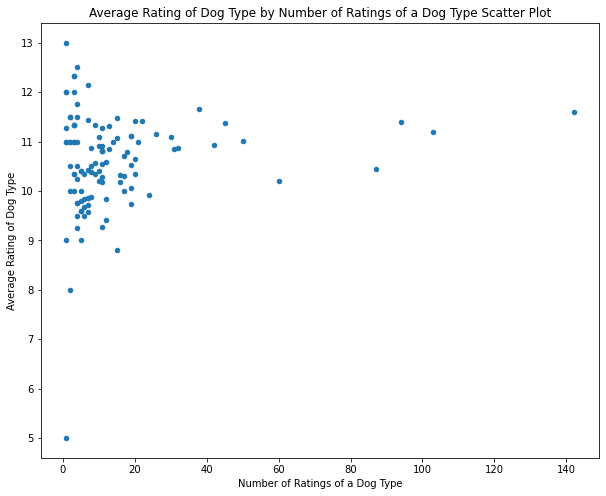

In [139]:
df.plot(x='dog_type_count', y='dog_type_mean', kind='scatter',figsize=(10, 8))
plt.xlabel('Number of Ratings of a Dog Type')
plt.ylabel('Average Rating of Dog Type')
plt.title('Average Rating of Dog Type by Number of Ratings of a Dog Type Scatter Plot')

fig = plt.gcf()
#plt.savefig('X:/' + newName + '.png', 
fig.savefig('output2.png',bbox_inches='tight')

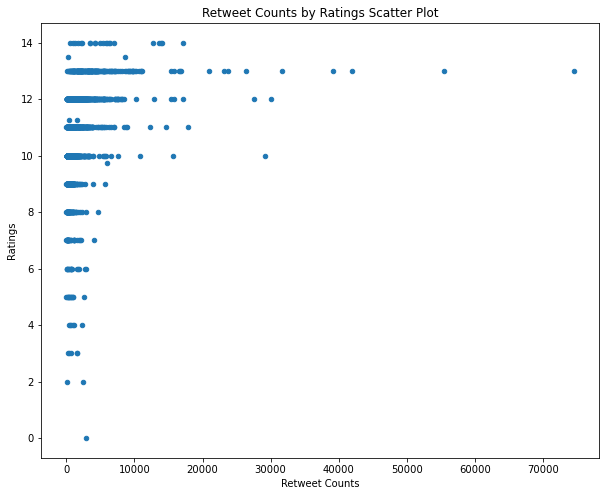

In [140]:
df_twitter.plot(x='retweet_count', y='rating', kind='scatter',figsize=(10, 8))
plt.xlabel('Retweet Counts')
plt.ylabel('Ratings')
plt.title('Retweet Counts by Ratings Scatter Plot')

fig = plt.gcf()
fig.savefig('output3.png',bbox_inches='tight')